This is a notebook to test construction a covariance matrix from equation 6 in the paper. I will use the data files provided.

In [20]:
import os
import numpy as np

######################################################
#  Setting up plots for Retina
######################################################

%config InlineBackend.figure_format = 'retina'
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

#########################################
# Setting up paths to data files
#########################################

basedir = os.path.dirname(os.path.abspath(''))
datadir = os.path.join(basedir, 'data')

binned_data_file = os.path.join(datadir, 'lcparam_DS17f.txt')
binned_sys_file = os.path.join(datadir, 'sys_DS17f.txt')

#########################################
# Loading data
#########################################

binned_data = np.genfromtxt(binned_data_file, usecols=(1,4,5))
zcmb = binned_data[:,0]
mb = binned_data[:, 1]
dmb = binned_data[:, 2]

binned_sys = np.loadtxt(binned_sys_file)
n = int(binned_sys[0])
print(n)

cov_sys = binned_sys[1:].reshape((n,n))
cov_stat = np.diag(dmb)

40
[[0.0311  0.      0.      ... 0.      0.      0.     ]
 [0.      0.02645 0.      ... 0.      0.      0.     ]
 [0.      0.      0.0231  ... 0.      0.      0.     ]
 ...
 [0.      0.      0.      ... 0.0276  0.      0.     ]
 [0.      0.      0.      ... 0.      0.05635 0.     ]
 [0.      0.      0.      ... 0.      0.      0.0735 ]]


The covariance matrix should be symmetric, so we can check that as a sanity check that we have read it in correctly. 

In [26]:
assert(np.sum(cov_sys - cov_sys.T)==0)

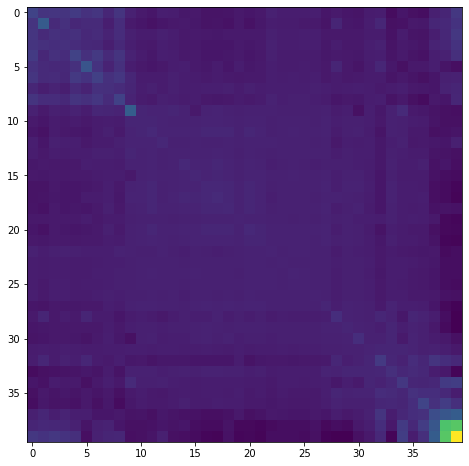

In [27]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(8,8))

ax.imshow(cov_sys)